## About the CIFAR-10 dataset

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) (classification of small images across 10 distinct classes---airplane, automobile, bird, cat, deer, dog, frog, horse, ship & truck).


![](cifar_10.png)

The CIFAR-10 dataset contains 50000 training examples and 10000 test examples. Each example is a $32 \times 32 \times 32$ pixels coloured image.

## Loading and pre-processing CIFAR-10 dataset



(50000, 32, 32, 3)
(10000, 32, 32, 3)


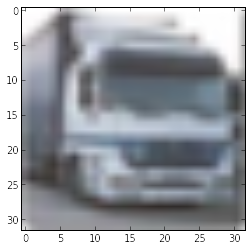

truck


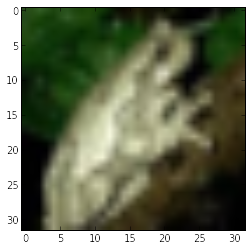

frog


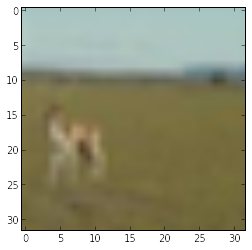

deer
(50000, 3072)
(10000, 3072)
[[ 0.15294118  0.29411766  0.10588235 ...,  0.00392157  0.00392157
   0.00392157]
 [ 0.67058825  0.78431374  0.7764706  ...,  0.43529412  0.40392157
   0.21176471]
 [ 0.8392157   0.81568629  0.79607844 ...,  0.71764708  0.66666669
   0.65490198]
 [ 0.8509804   0.8509804   0.88235295 ...,  0.42745098  0.43529412
   0.40392157]]


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
os.environ['KERAS_BACKEND']="theano"
import theano

from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from sklearn.utils import shuffle
from skimage import feature

(X_train_img, y_train), (X_test_img, y_test) = cifar10.load_data() # fetch CIFAR-10 data # dirname="."??
print(X_train_img.shape)
print(X_test_img.shape)
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Shuffle examples
X_train_img, y_train = shuffle(X_train_img, y_train)
X_test_img, y_test = shuffle(X_test_img, y_test)

plt.figure()
plt.imshow(X_train_img[0])
plt.show()
print(class_names[int(y_train[0])])
plt.figure()
plt.imshow(X_train_img[1])
plt.show()
print(class_names[int(y_train[1])])
plt.figure()
plt.imshow(X_train_img[2])
plt.show()
print(class_names[int(y_train[2])])

num_train, depth, height, width = X_train_img.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test_img.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

# Produce a [0;1] normalized "image" for potential input into a convNet
X_train_img_norm = X_train_img.astype('float32') 
X_test_img_norm = X_test_img.astype('float32')
X_train_img_norm /= np.max(X_train_img_norm) # Normalise data to [0, 1] range
X_test_img_norm /= np.max(X_train_img_norm) # Normalise data to [0, 1] range

# Rasterize normalized images into 1D vectors for potential input of raw image into standard ML algo such as kNN, MLP, SVM, etc
X_train_vectNorm = X_train_img_norm.reshape(num_train,height*width*depth)
X_test_vectNorm = X_test_img_norm.reshape(num_test,height*width*depth)

print(X_train_vectNorm.shape)
print(X_test_vectNorm.shape)
print(X_train_vectNorm[1:5])


# Compute HOG feature as potential BETTER input into standard ML algo such as kNN, MLP, SVM, etc
#
# hog, hog_image = skimage.feature.hog(img, orientations=9, pixels_per_cell=(8, 8), 
#                                     cells_per_block=(3, 3), block_norm=None, 
#                                     visualise=True, transform_sqrt=False, feature_vector=True)
# TO BE CORRECTED/FINALIZED!...


# Une fonction pour afficher graphiquement les matrices de confusion

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

# Definition for the function that plot the confusion matrix
# See : http://www.sci-kit.org/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Baseline method: kNN on raw normalized pixels

(50000, 1)
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]
Normalized confusion matrix
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

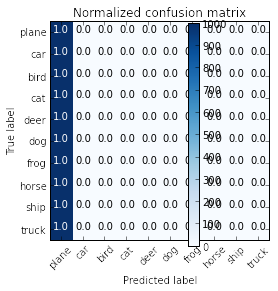

In [17]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
print(y_train.shape)
clf.fit(X_train_vectNorm[:30000], y_train.ravel()[:30000]) # utiliser toutes les données conduit à une Memory Error

y_test_pred_knn = clf.predict(X_test_vectNorm)


cnf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
print(cnf_matrix_knn)

np.set_printoptions(precision=2)
plt.figure()
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cnf_matrix_knn, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Blablabla

In [ ]:
a = 3